C:\Users\SergLena\AppData\Local\Temp\ipykernel_10936\318288800.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_group=data_group.groupby("Year").mean()#Высчитываем среднее по сгруппированным данным !ПО СГРУППИРОВАННЫМ ДАННЫМ! data_group


   global_id  ID  Year  UnemployedMen  UnemployedWomen  UnemployedYoung  \
0   39809862   1  2001           8896            25762             6696   
1   64592413   3  2003           8679            24967             6226   
2   64592414   4  2004           9822            25239             7318   
3   64592415   5  2005          10844            23597             6890   
4   64592416   6  2006          11041            22928             6604   

   UnemployedDisabled  UnemployedTotal   Period  Unnamed: 9      Доля  
0                 824            34658  Декабрь         NaN  2.377517  
1                1155            33646  Декабрь         NaN  3.432800  
2                1411            35061  Декабрь         NaN  4.024415  
3                1531            34441  Декабрь         NaN  4.445283  
4                1671            33969  Декабрь         NaN  4.919191  
Year
2012    4.122145
2013    4.031303
2014    4.025994
2015    2.903958
2016    2.890474
2017    2.656077
2018    2.

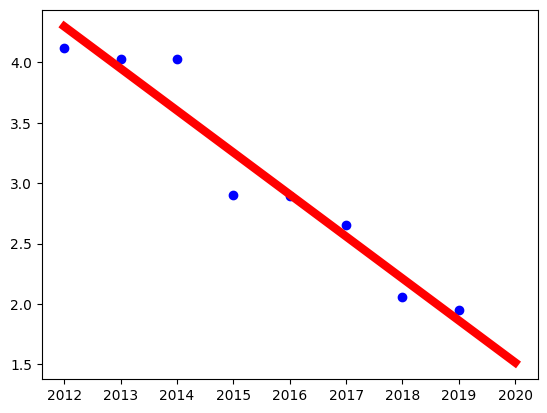

Можно сравнить отличие расчетного значения с данными (2019):  [[1.86]]


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data=pd.read_csv("https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv", delimiter=";")#Загружаем данные
data["Доля"]=data.apply(lambda x: 100*x[6]/x[7], axis=1)#получаем отношение 7 колонки к 6 (индексы начинаются с нуля)
data_group=data.groupby("Year").filter(lambda x: x["Доля"].count()>5)#Если в году меньше 6 значений, они отбросятся
data_group=data_group.groupby("Year").mean()#Высчитываем среднее по сгруппированным данным !ПО СГРУППИРОВАННЫМ ДАННЫМ! data_group
x=np.array(data_group.index).reshape(len(data_group), 1)#Задаем значение х
y=np.array(data_group["Доля"]).reshape(len(data_group), 1)#Задаем значение y
model=LinearRegression()#Иызываем метод линейной регрессии
model.fit(x, y)
print (data.head())
print (data_group["Доля"])
print ("Предполагаемое значение на 2020: ", model.predict(np.array(2020).reshape(1, 1)).round(2))
plt.scatter(x, y, color="blue")#Разбрасывает данные на графике
x=np.append(x, [2020]).reshape(len(data_group.index)+1, 1)#добавим к индексу полученных значений данные 2020
plt.plot(x, model.predict(x), color="red", linewidth=6)#укажем, что цвет линии будет красный, а толщина 6
plt.show()
print ("Можно сравнить отличие расчетного значения с данными (2019): ", model.predict(np.array(2019).reshape(1, 1)).round(2))

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data=pd.read_csv("https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv", delimiter=";")
data["Доля"]=100*data["UnemployedDisabled"]/data["UnemployedTotal"]
data_group=data.groupby("Year").filter(lambda x: x["Доля"].count()>5)
data_group=data_group.groupby("Year").mean()
x=np.array(data_group.index).reshape(len(data_group), 1)
y=np.array(data_group["Доля"]).reshape(len(data_group), 1)
model=LinearRegression()
model.fit(x, y)
print ("Предполагаемое значение на 2020: ", model.predict(np.array(2020).reshape(1, 1)).round(2))

Предполагаемое значение на 2020:  [[1.52]]


C:\Users\SergLena\AppData\Local\Temp\ipykernel_10936\4150880004.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_group=data_group.groupby("Year").mean()
